In [1]:
# Install kaggle library if not already installed
!pip install -q kaggle

# Make a directory for Kaggle JSON
!mkdir -p ~/.kaggle


# Move the kaggle.json file to the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Set proper permissions for the file
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
# Download the dataset from Kaggle (replace with your dataset link)
!kaggle datasets download -d ambarish/breakhis



Dataset URL: https://www.kaggle.com/datasets/ambarish/breakhis
License(s): unknown
100% 3.98G/3.99G [00:56<00:00, 75.1MB/s]
100% 3.99G/3.99G [00:56<00:00, 75.8MB/s]


In [3]:
# Unzip the dataset
!unzip breakhis.zip -d breakhis_data


Streaming output truncated to the last 5000 lines.
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-026.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-027.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-028.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-029.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-030.png  
  inflating: breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-031.p

In [4]:
import os
import shutil

# Define the paths
source_dir = "/content/breakhis_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast"
base_dest_dir = "/content/breakhis_classification_data"

# Create destination directories if not exist
if not os.path.exists(base_dest_dir):
    os.makedirs(base_dest_dir)

# Traverse through the source dataset and categorize images into subfolders
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".png"):  # Only process image files
            # Check if 'benign' or 'malignant' is in the folder name (this indicates the main class)
            if "benign" in root.lower():
                main_class = "benign"
            elif "malignant" in root.lower():
                main_class = "malignant"
            else:
                continue

            # Extract the subclass name from the folder structure
            # Typically, it should be in a part of the directory path, e.g., adenosis, fibroadenoma, etc.
            subclass = os.path.basename(root).lower()

            # Create a folder path for both main class and subclass
            dest_folder = os.path.join(base_dest_dir, main_class, subclass)

            # Create the subclass folder if it does not exist
            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)

            # Move the images into the respective folders
            source_file = os.path.join(root, file)
            shutil.copy(source_file, dest_folder)

print("Images have been successfully organized into subclass folders.")


Images have been successfully organized into subclass folders.


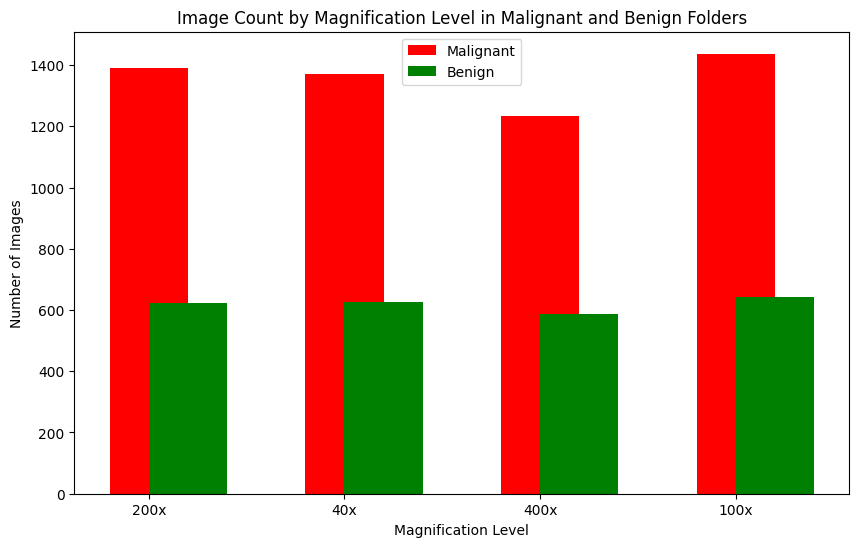

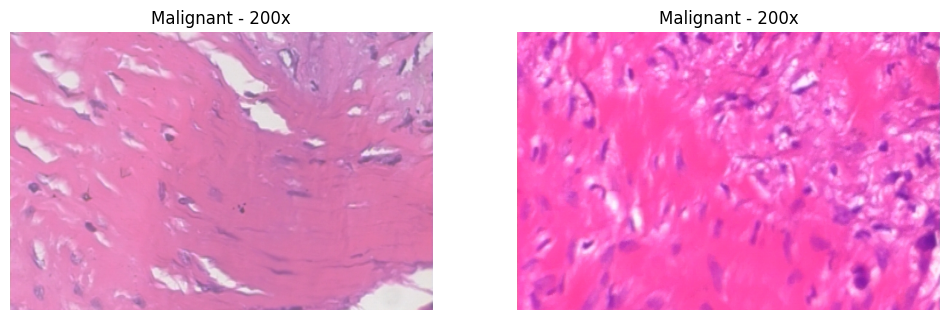

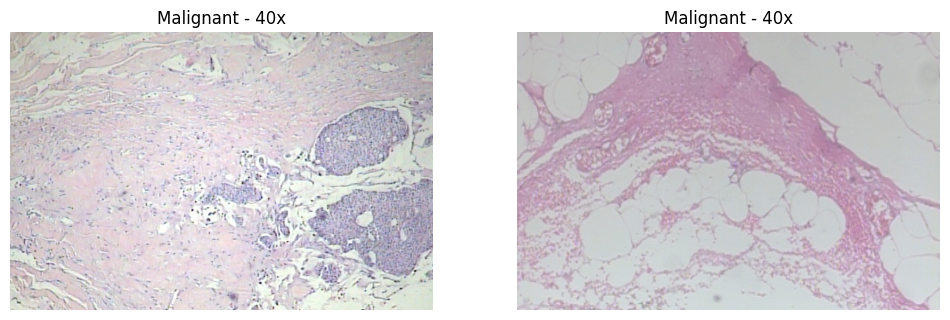

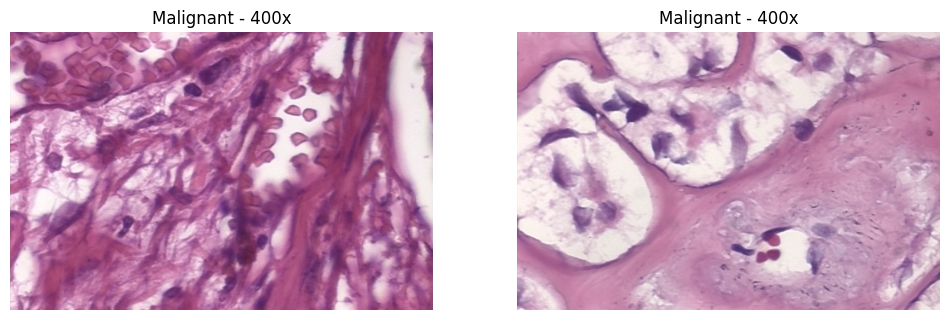

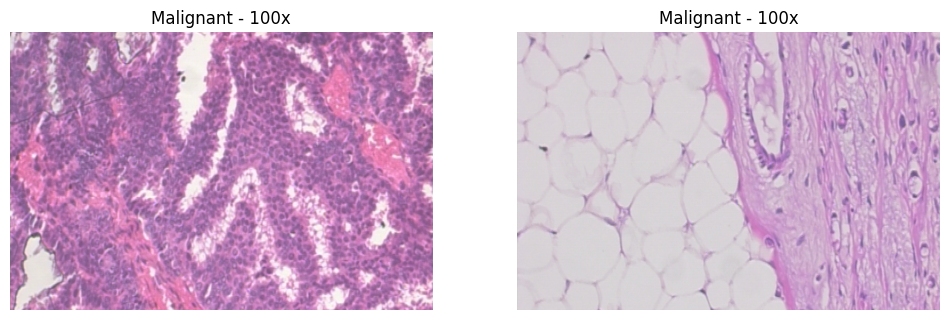

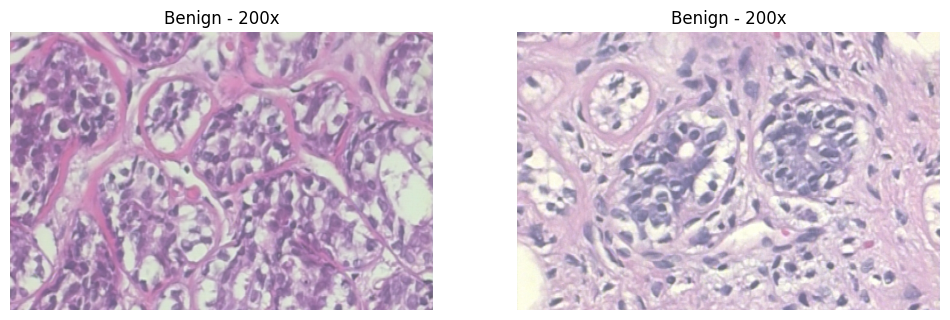

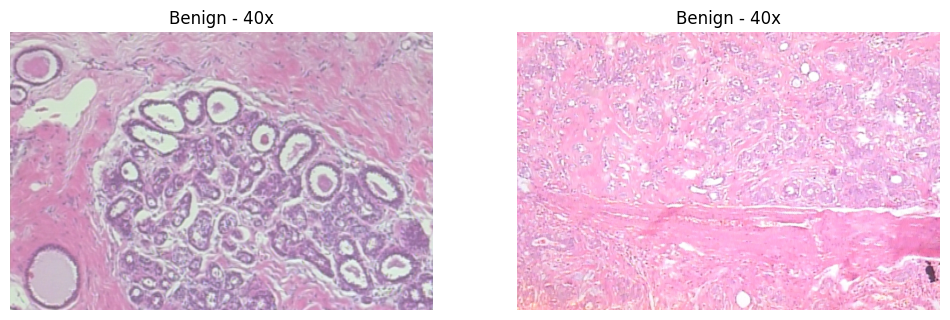

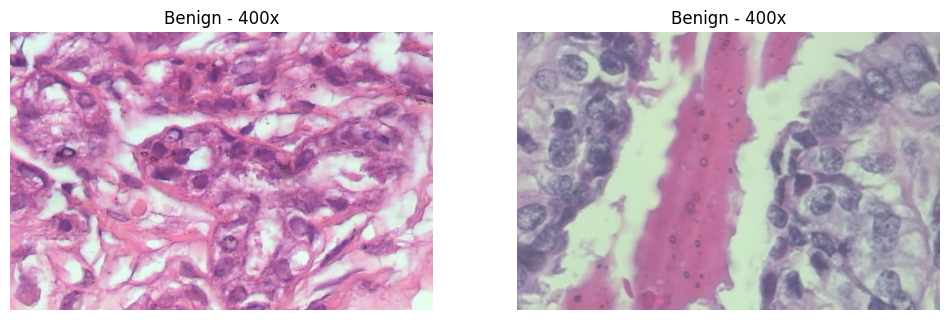

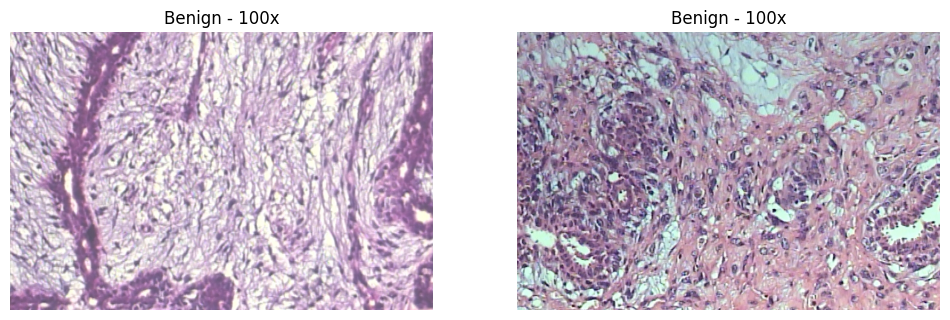

In [5]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Paths to dataset
malignant_path = '/content/breakhis_classification_data/malignant'
benign_path = '/content/breakhis_classification_data/benign'

# Function to count images in each subfolder
def count_images_by_magnification(path):
    magnification_counts = {}
    for magnification_folder in os.listdir(path):
        magnification_path = os.path.join(path, magnification_folder)
        if os.path.isdir(magnification_path):
            images = os.listdir(magnification_path)
            magnification_counts[magnification_folder] = len(images)
    return magnification_counts

# Get counts for each magnification level in malignant and benign folders
malignant_counts = count_images_by_magnification(malignant_path)
benign_counts = count_images_by_magnification(benign_path)

# Plotting the counts of images by magnification level
labels = list(malignant_counts.keys())
malignant_vals = list(malignant_counts.values())
benign_vals = list(benign_counts.values())

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, malignant_vals, width=0.4, label='Malignant', color='red', align='center')
plt.bar(x, benign_vals, width=0.4, label='Benign', color='green', align='edge')
plt.xlabel('Magnification Level')
plt.ylabel('Number of Images')
plt.title('Image Count by Magnification Level in Malignant and Benign Folders')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Function to display random images from each magnification level for both classes
def display_random_images_by_magnification(base_path, class_name, num_images=2):
    for magnification_folder in os.listdir(base_path):
        magnification_path = os.path.join(base_path, magnification_folder)
        if os.path.isdir(magnification_path):
            images = os.listdir(magnification_path)
            if len(images) < num_images:
                continue  # Skip if there aren't enough images to display
            selected_images = random.sample(images, num_images)
            plt.figure(figsize=(12, 4))
            for i, img_name in enumerate(selected_images):
                img_path = os.path.join(magnification_path, img_name)
                img = Image.open(img_path)
                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f'{class_name} - {magnification_folder}')
            plt.show()

# Display random images from each magnification level in malignant and benign folders
display_random_images_by_magnification(malignant_path, 'Malignant')
display_random_images_by_magnification(benign_path, 'Benign')


In [6]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [7]:

# Paths to dataset
malignant_path = '/content/breakhis_classification_data/malignant/100x'
benign_path = '/content/breakhis_classification_data/benign/100x'

# Function to load images from a given path
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        img = img.resize((128, 128))  # Resize images to 128x128
        img = np.array(img) / 255.0  # Normalize to [0, 1]
        images.append(img)
        labels.append(label)
    return images, labels

# Load malignant and benign images
malignant_images, malignant_labels = load_images_from_folder(malignant_path, 1)  # Label 1 for malignant
benign_images, benign_labels = load_images_from_folder(benign_path, 0)  # Label 0 for benign


In [8]:


# Combine the images and labels
X = np.array(malignant_images + benign_images)
y = np.array(malignant_labels + benign_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Model Training**

In [10]:


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 316ms/step - accuracy: 0.5475 - loss: 3.5205 - val_accuracy: 0.6426 - val_loss: 0.6783
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6742 - loss: 0.6021 - val_accuracy: 0.6426 - val_loss: 0.5906
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7110 - loss: 0.5354 - val_accuracy: 0.6426 - val_loss: 0.7050
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6942 - loss: 0.5523 - val_accuracy: 0.7598 - val_loss: 0.5505
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7708 - loss: 0.4933 - val_accuracy: 0.7808 - val_loss: 0.5058
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7328 - loss: 0.5157 - val_accuracy: 0.6426 - val_loss: 0.5964
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6849 - loss: 0.5435 - val_accuracy: 0.7568 - val_loss: 0.5130
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8006 - loss: 0.4808 - val_accuracy: 0.7808 -

In [12]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.8069 - loss: 0.5096
Test Accuracy: 0.82


In [13]:

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
              precision    recall  f1-score   support

           0       0.81      0.56      0.66       135
           1       0.82      0.94      0.87       282

    accuracy                           0.82       417
   macro avg       0.81      0.75      0.77       417
weighted avg       0.81      0.82      0.81       417



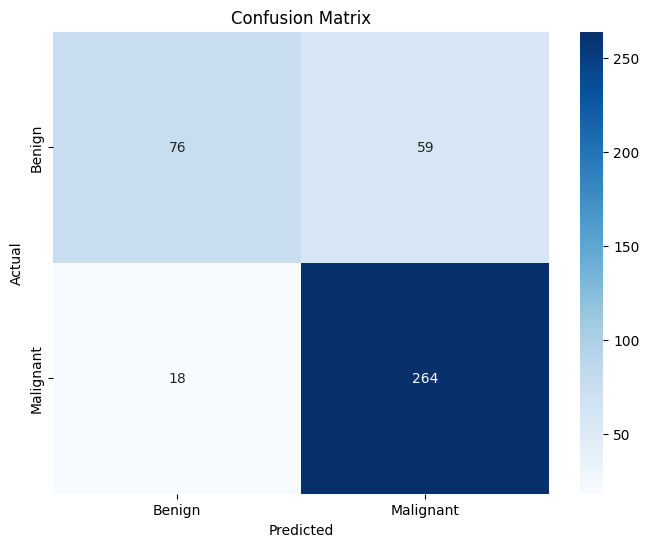

In [14]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

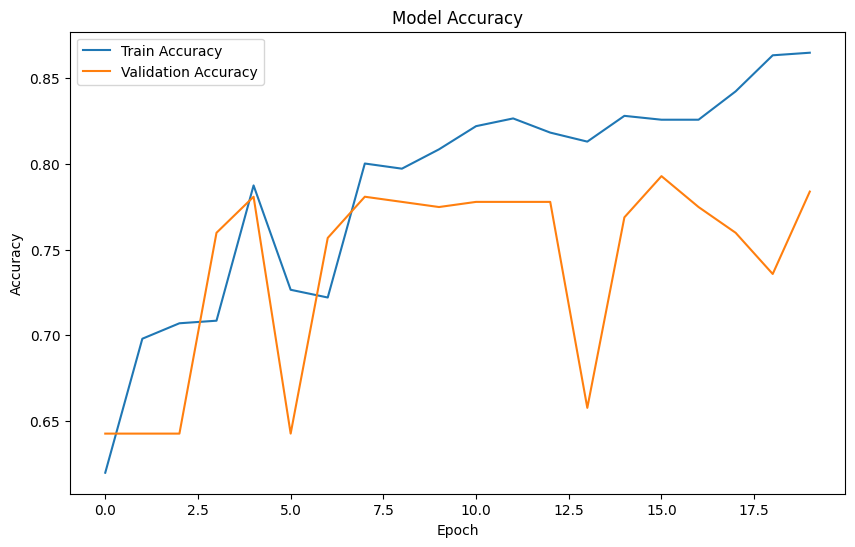

In [15]:



# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


# **Model Training**

In [16]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [17]:

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9176 - loss: 0.2316 - val_accuracy: 0.7808 - val_loss: 0.5332
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9302 - loss: 0.1853 - val_accuracy: 0.7778 - val_loss: 0.6967
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9296 - loss: 0.1773 - val_accuracy: 0.7838 - val_loss: 0.6025
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9532 - loss: 0.1433 - val_accuracy: 0.7868 - val_loss: 0.6063
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9657 - loss: 0.1306 - val_accuracy: 0.7898 - val_loss: 0.6294
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9592 - loss: 0.1358 - val_accuracy: 0.7958 - val_loss: 0.6097
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9540 - loss: 0.1183 - val_accuracy: 0.7898 - val_loss: 0.6181
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9701 - loss: 0.1029 - val_accuracy: 0.7928 - 

In [18]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8021 - loss: 1.1612
Test Accuracy: 0.82


In [19]:

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
              precision    recall  f1-score   support

           0       0.88      0.52      0.65       135
           1       0.81      0.96      0.88       282

    accuracy                           0.82       417
   macro avg       0.84      0.74      0.76       417
weighted avg       0.83      0.82      0.81       417



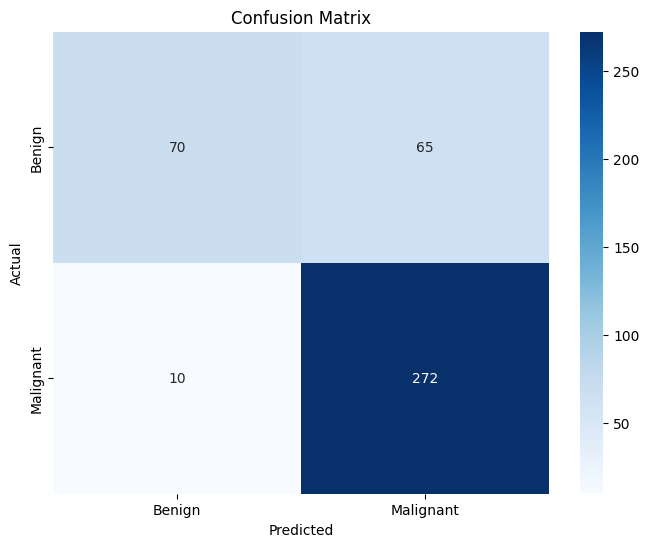

In [20]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

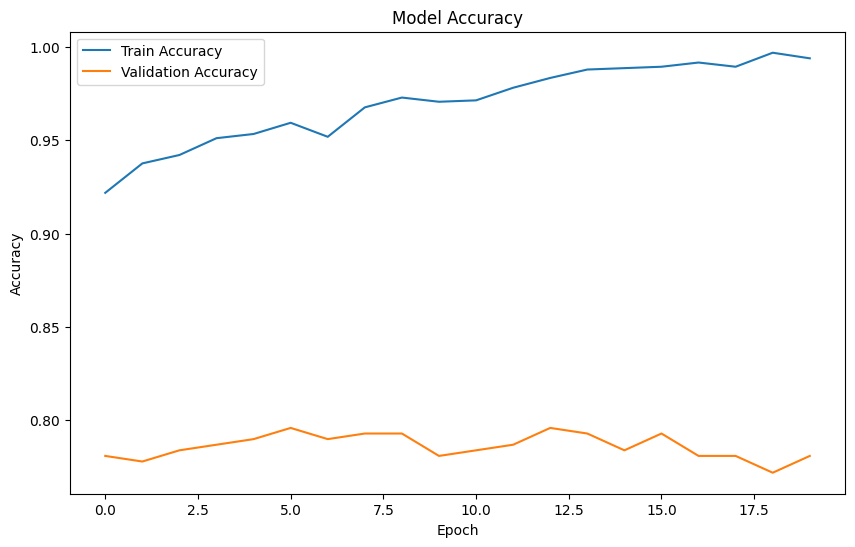

In [21]:



# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


# **Deep Learning Model**

## **VGG16**

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split


In [24]:
# Define VGG16 model for 128x128 input with fine-tuning
def create_vgg16(input_shape=(128, 128, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = True  # Allow fine-tuning

    # Freeze all layers except the last 4
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)  # Use base model
    x = GlobalAveragePooling2D()(x)         # Pooling layer
    x = Dense(256, activation='relu')(x)    # Fully connected layer
    x = Dropout(0.2)(x)                     # Regularization
    outputs = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate for fine-tuning
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and compile the fine-tuned VGG16 model
vgg16_model = create_vgg16()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
# Train the VGG16 model
history = vgg16_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20
)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.7171 - loss: 0.5932 - val_accuracy: 0.8034 - val_loss: 0.4092
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.8475 - loss: 0.3453 - val_accuracy: 0.8297 - val_loss: 0.3812
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8994 - loss: 0.2496 - val_accuracy: 0.8777 - val_loss: 0.2861
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9562 - loss: 0.1323 - val_accuracy: 0.8849 - val_loss: 0.3240
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9603 - loss: 0.0919 - val_accuracy: 0.9041 - val_loss: 0.2935
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9859 - loss: 0.0467 - val_accuracy: 0.8801 - val_loss: 0.3706
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9759 - loss: 0.0476 - val_accuracy: 0.8753 - val_loss: 0.4588
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9864 - loss: 0.0343 - val_accuracy: 0.9233 -

In [26]:

# Evaluate the model
loss, accuracy = vgg16_model.evaluate(X_test, y_test)
print(f'VGG16 Test Accuracy: {accuracy:.2f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9155 - loss: 0.5765
VGG16 Test Accuracy: 0.93


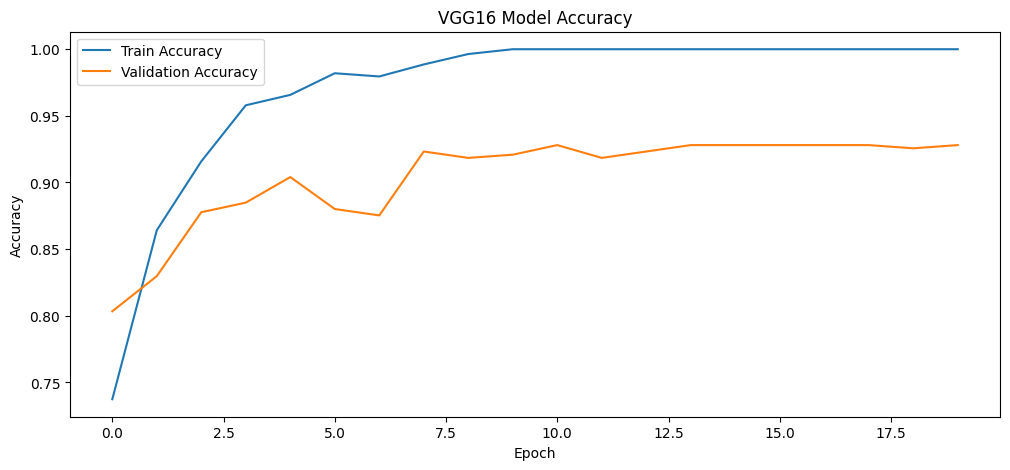

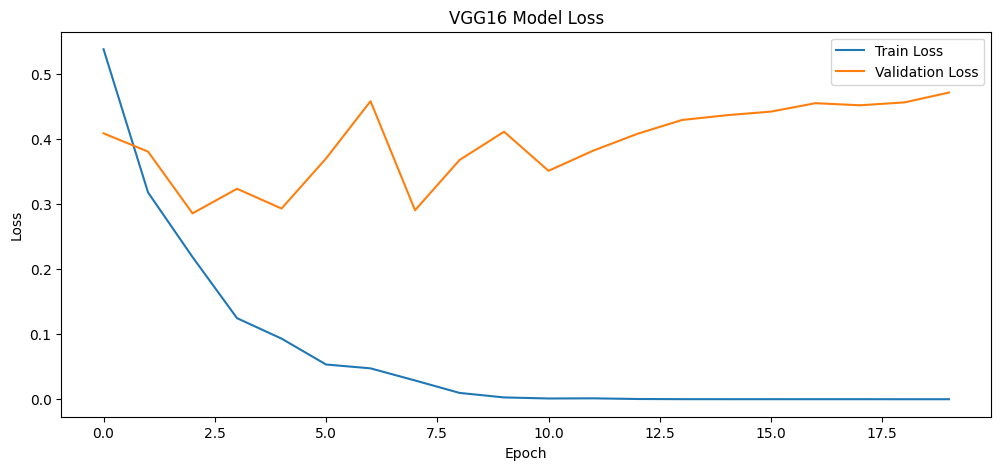

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step

VGG16 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       135
           1       0.93      0.96      0.95       282

    accuracy                           0.93       417
   macro avg       0.92      0.91      0.92       417
weighted avg       0.93      0.93      0.93       417



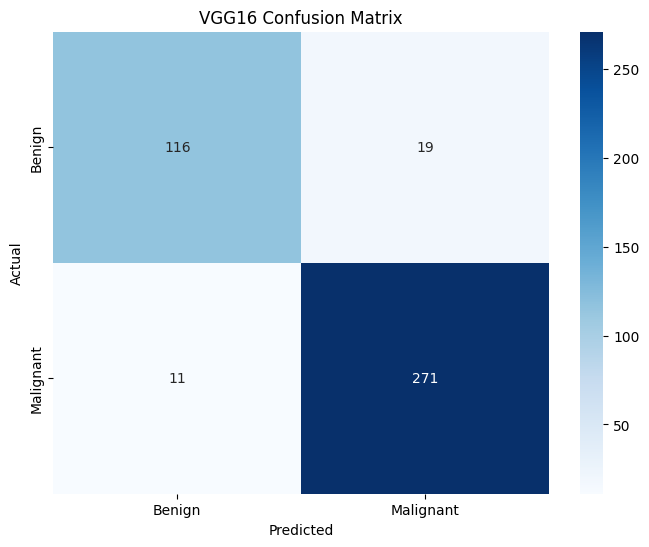

In [27]:

# Metrics and plots
def plot_metrics(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Confusion matrix and classification report
    y_pred = (vgg16_model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Plot metrics
plot_metrics(history, "VGG16")

## **VGG16**

In [29]:
from tensorflow.keras.optimizers import RMSprop

In [31]:
# Define VGG16 model for 128x128 input with fine-tuning
def create_vgg16(input_shape=(128, 128, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = True  # Allow fine-tuning

    # Freeze all layers except the last 4
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)  # Use base model
    x = GlobalAveragePooling2D()(x)         # Pooling layer
    x = Dense(256, activation='relu')(x)    # Fully connected layer
    x = Dropout(0.2)(x)                     # Regularization
    outputs = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

    model = Model(inputs, outputs)
    model.compile(optimizer=RMSprop(),  # change the optimizer
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and compile the fine-tuned VGG16 model
vgg16_model = create_vgg16()


In [32]:
# Train the VGG16 model
history = vgg16_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20
)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.6305 - loss: 2.4031 - val_accuracy: 0.7674 - val_loss: 0.5957
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6773 - loss: 0.6214 - val_accuracy: 0.6763 - val_loss: 0.6168
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7845 - loss: 0.4874 - val_accuracy: 0.8537 - val_loss: 0.3538
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8098 - loss: 0.4289 - val_accuracy: 0.7410 - val_loss: 0.5222
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8232 - loss: 0.4015 - val_accuracy: 0.6763 - val_loss: 1.0987
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8497 - loss: 0.4051 - val_accuracy: 0.8585 - val_loss: 0.3639
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8672 - loss: 0.3105 - val_accuracy: 0.8705 - val_loss: 0.3067
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9185 - loss: 0.2322 - val_accuracy: 0.8777 - v

In [33]:

# Evaluate the model
loss, accuracy = vgg16_model.evaluate(X_test, y_test)
print(f'VGG16 Test Accuracy: {accuracy:.2f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9067 - loss: 0.3208
VGG16 Test Accuracy: 0.91


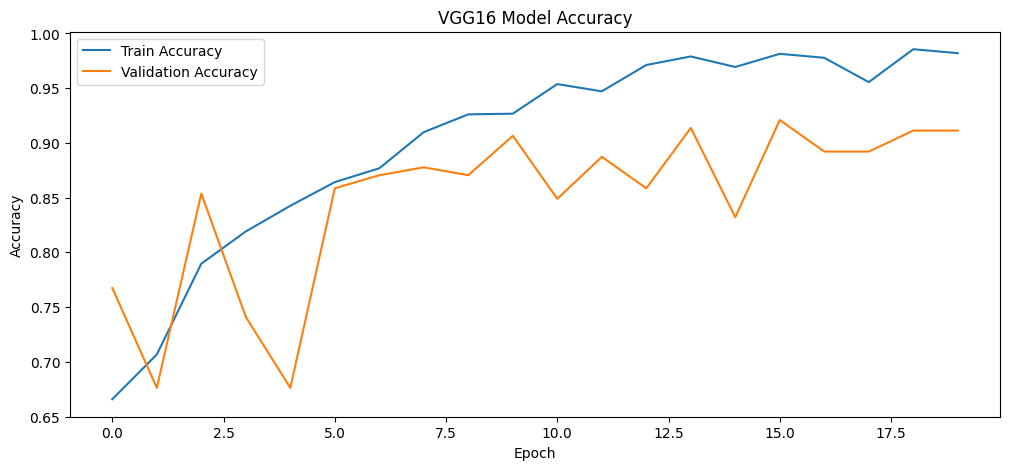

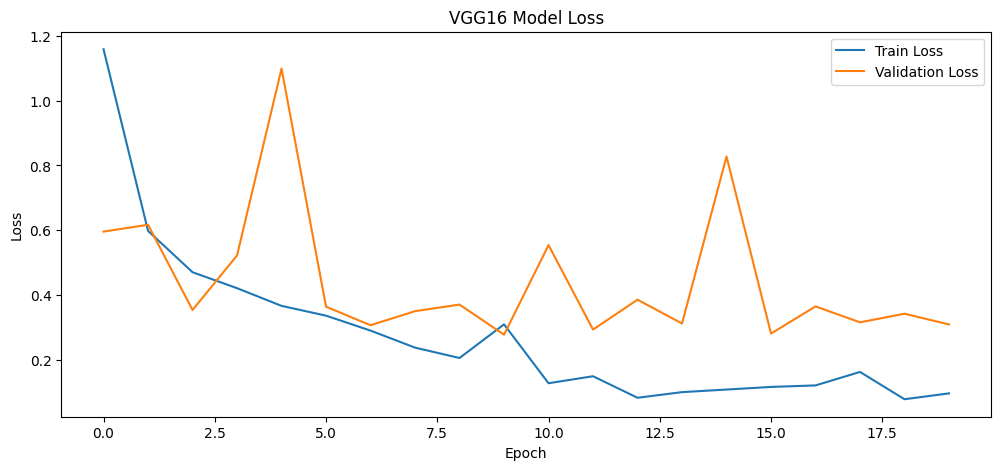

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step

VGG16 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86       135
           1       0.92      0.96      0.94       282

    accuracy                           0.91       417
   macro avg       0.91      0.89      0.90       417
weighted avg       0.91      0.91      0.91       417



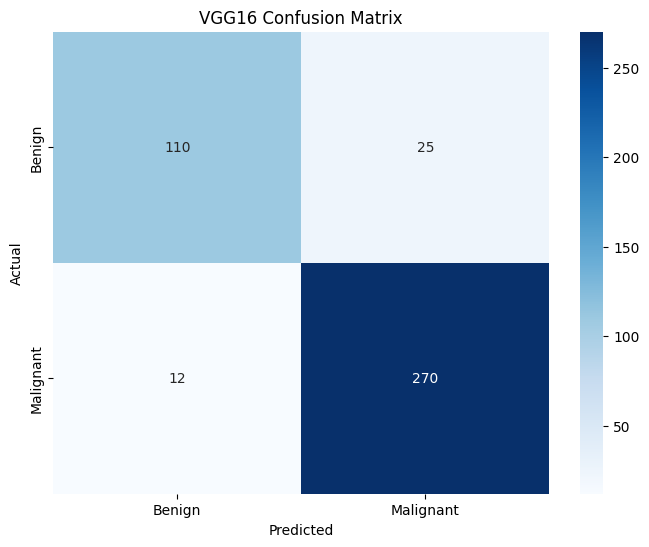

In [34]:

# Metrics and plots
def plot_metrics(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Confusion matrix and classification report
    y_pred = (vgg16_model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Plot metrics
plot_metrics(history, "VGG16")

## **ResNet**

In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input


def create_resnet50(input_shape=(128, 128, 3)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = True  # Unfreeze the base model
    # Freeze all layers up to the last 20 layers, for example
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)  # Increased dropout to avoid overfitting
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs, outputs)

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Create and compile the ResNet50 model
resnet50_model = create_resnet50()


In [38]:
# Train ResNet50 model
resnet50_history = resnet50_model.fit(X_train, y_train,
    validation_data=(X_test, y_test),
                                      batch_size=32,
                                      epochs=20)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.6998 - loss: 0.6168 - val_accuracy: 0.6763 - val_loss: 0.6337
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.7052 - loss: 0.5922 - val_accuracy: 0.6763 - val_loss: 0.6301
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6980 - loss: 0.5828 - val_accuracy: 0.6763 - val_loss: 0.6291
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7091 - loss: 0.5653 - val_accuracy: 0.6763 - val_loss: 0.6265
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7105 - loss: 0.5558 - val_accuracy: 0.6763 - val_loss: 0.6228
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7281 - loss: 0.5453 - val_accuracy: 0.6763 - val_loss: 0.6152
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7420 - loss: 0.5330 - val_accuracy: 0.6763 - val_loss: 0.6032
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7653 - loss: 0.5194 - val_accuracy: 0.6859 

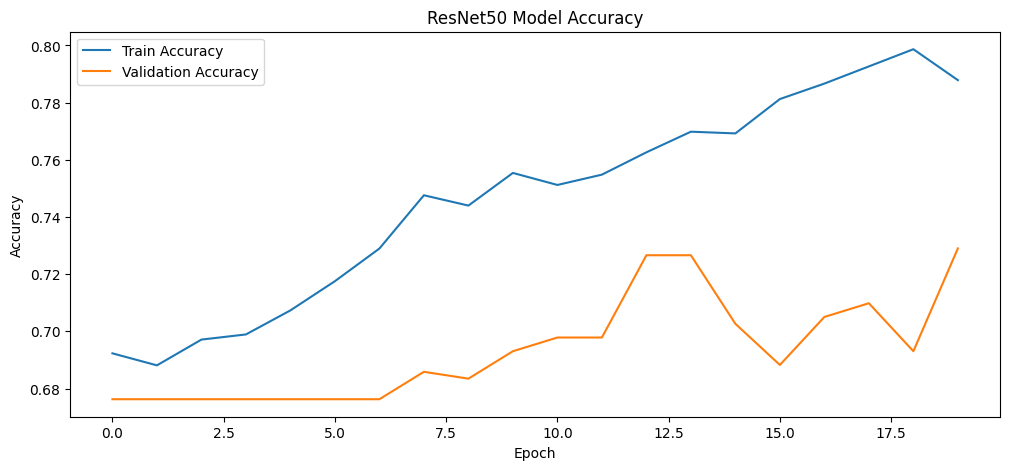

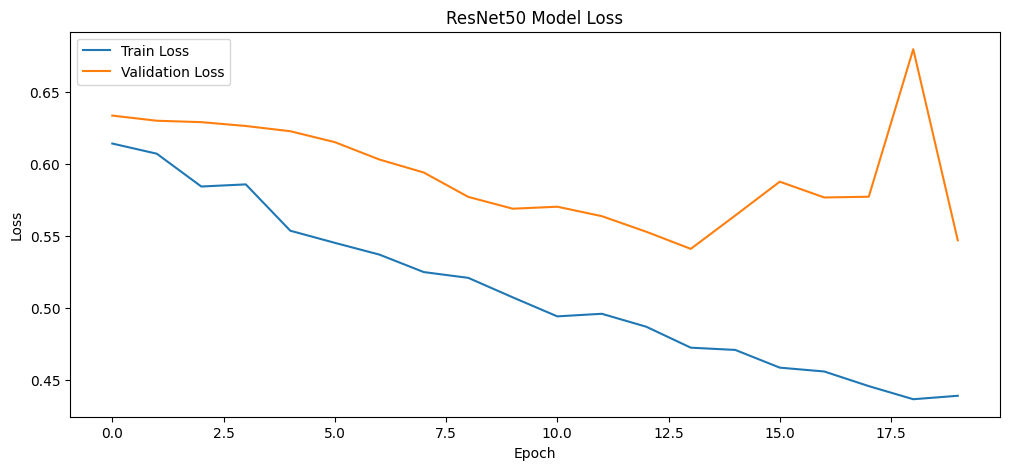

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Function to plot metrics
def plot_metrics(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# Plot metrics for ResNet50
plot_metrics(resnet50_history, "ResNet50")


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step

<Functional name=functional_6, built=True> Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.27      0.39       135
           1       0.73      0.95      0.83       282

    accuracy                           0.73       417
   macro avg       0.73      0.61      0.61       417
weighted avg       0.73      0.73      0.68       417



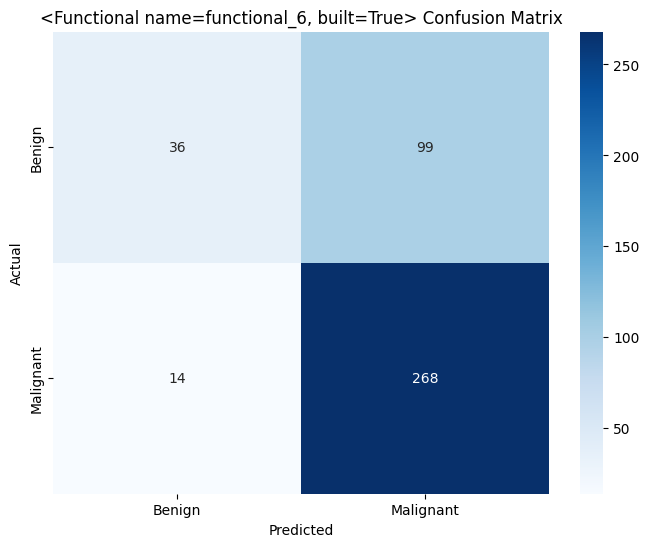

In [40]:
# Confusion matrix and classification report
y_pred = (resnet50_model.predict(X_test) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)
print(f"\n{resnet50_model} Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'{resnet50_model} Confusion Matrix')
plt.show()


## **ResNet**

In [41]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input


def create_resnet50(input_shape=(128, 128, 3)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = True  # Unfreeze the base model
    # Freeze all layers up to the last 20 layers, for example
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)  # Increased dropout to avoid overfitting
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs, outputs)

    model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Create and compile the ResNet50 model
resnet50_model = create_resnet50()


In [43]:
# Train ResNet50 model
resnet50_history = resnet50_model.fit(X_train, y_train,
    validation_data=(X_test, y_test),
                                      batch_size=32,
                                      epochs=20)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.6591 - loss: 0.7750 - val_accuracy: 0.6763 - val_loss: 0.6336
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7072 - loss: 0.6019 - val_accuracy: 0.6763 - val_loss: 0.6241
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6718 - loss: 0.6054 - val_accuracy: 0.6763 - val_loss: 0.6177
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6984 - loss: 0.5767 - val_accuracy: 0.6763 - val_loss: 0.6089
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7001 - loss: 0.5809 - val_accuracy: 0.6763 - val_loss: 0.6056
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6875 - loss: 0.5739 - val_accuracy: 0.6715 - val_loss: 0.6021
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7087 - loss: 0.5518 - val_accuracy: 0.4820 - val_loss: 0.7082
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6961 - loss: 0.5749 - val_accuracy: 0.6211 -

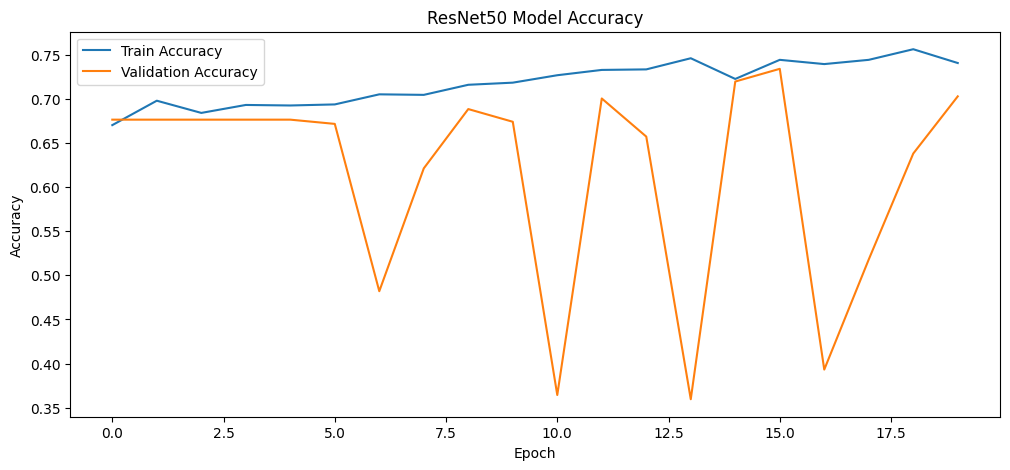

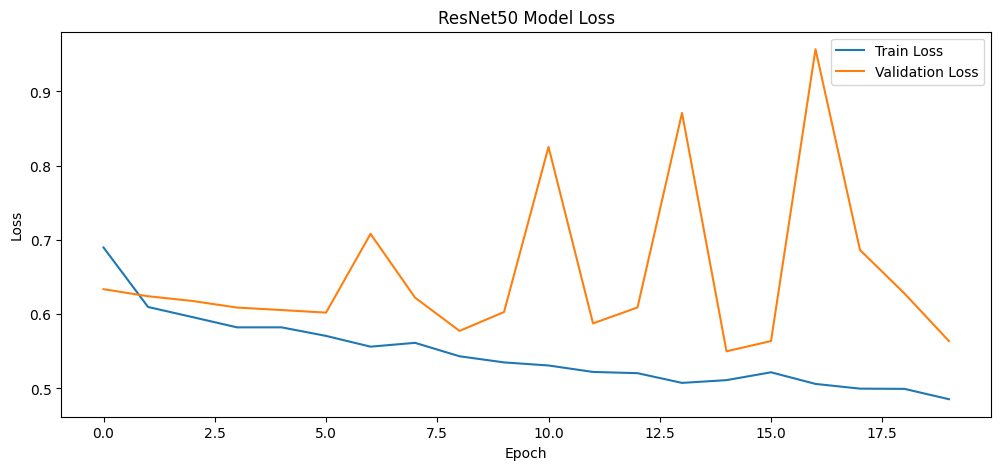

In [44]:


# Plot metrics for ResNet50
plot_metrics(resnet50_history, "ResNet50")


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step

<Functional name=functional_7, built=True> Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.14      0.23       135
           1       0.70      0.97      0.82       282

    accuracy                           0.70       417
   macro avg       0.70      0.56      0.53       417
weighted avg       0.70      0.70      0.63       417



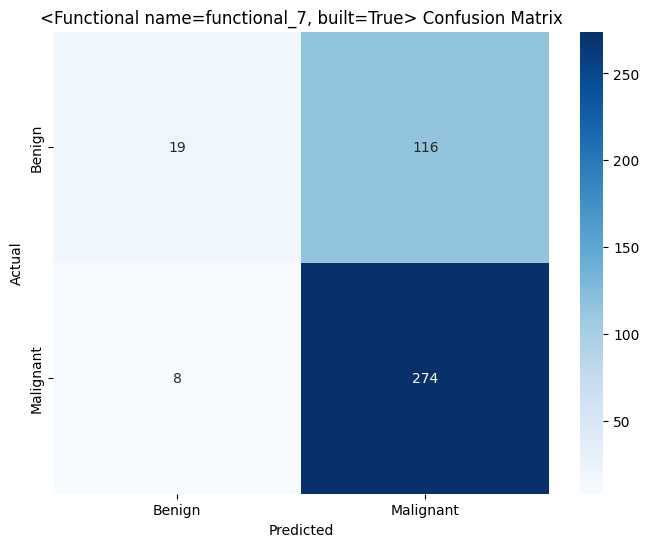

In [45]:
# Confusion matrix and classification report
y_pred = (resnet50_model.predict(X_test) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)
print(f"\n{resnet50_model} Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'{resnet50_model} Confusion Matrix')
plt.show()


## **MObileNet**

In [46]:
from tensorflow.keras.applications import MobileNet


def create_mobilenet(input_shape=(128, 128, 3)):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs, outputs)

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [47]:
model_mobilenet=create_mobilenet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [48]:
# Train the model
history_mobilenet = model_mobilenet.fit(X_train, y_train,
    validation_data=(X_test, y_test),batch_size=32,
                                      epochs=20)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.6770 - loss: 0.7529 - val_accuracy: 0.8345 - val_loss: 0.3939
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8624 - loss: 0.3517 - val_accuracy: 0.8609 - val_loss: 0.3215
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9038 - loss: 0.2495 - val_accuracy: 0.8729 - val_loss: 0.3064
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9389 - loss: 0.1964 - val_accuracy: 0.8873 - val_loss: 0.2848
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9506 - loss: 0.1666 - val_accuracy: 0.9041 - val_loss: 0.2680
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9708 - loss: 0.1049 - val_accuracy: 0.8945 - val_loss: 0.2761
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9810 - loss: 0.0809 - val_accuracy: 0.9089 - val_loss: 0.2573
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9840 - loss: 0.0689 - val_accuracy: 0.8921 - 

In [49]:

# Evaluate the model
loss, accuracy = model_mobilenet.evaluate(X_test, y_test)
print(f'MObilenet Test Accuracy: {accuracy:.2f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8781 - loss: 0.5087
MObilenet Test Accuracy: 0.90


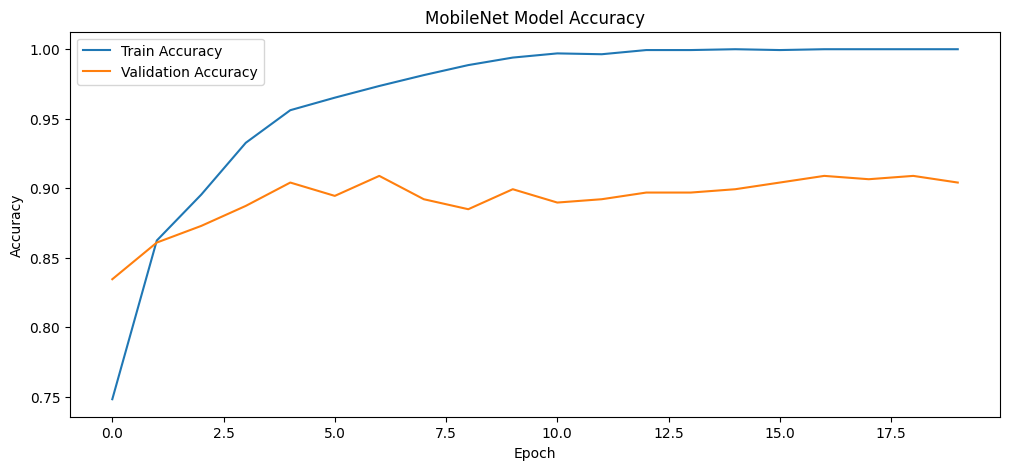

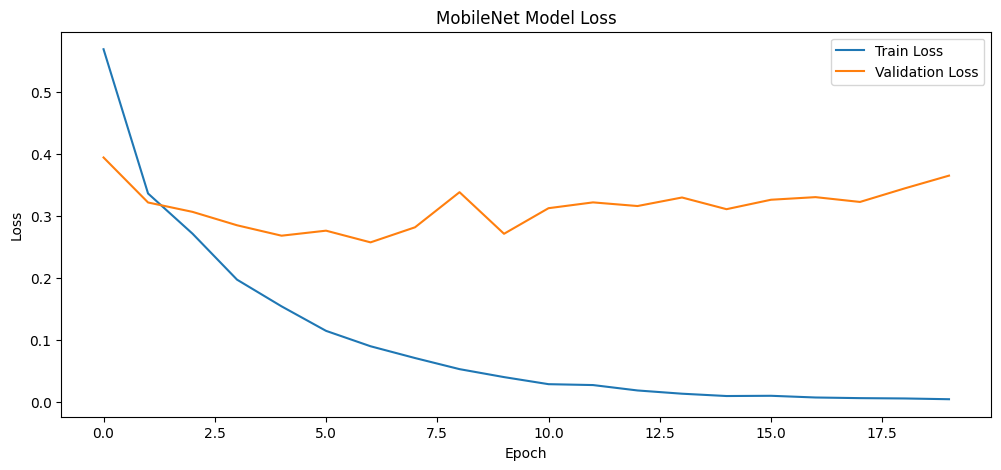

In [50]:
plot_metrics(history_mobilenet, "MobileNet")


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step

<Functional name=functional_8, built=True> Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83       135
           1       0.89      0.98      0.93       282

    accuracy                           0.90       417
   macro avg       0.92      0.86      0.88       417
weighted avg       0.91      0.90      0.90       417



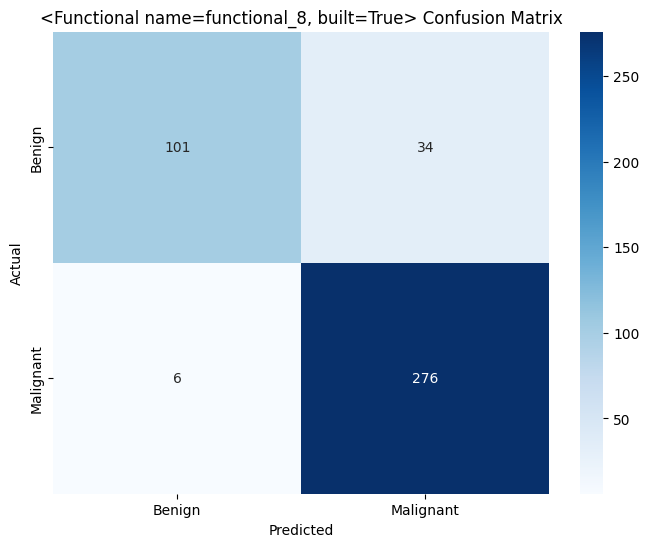

In [51]:
# Confusion matrix and classification report
y_pred = (model_mobilenet.predict(X_test) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)
print(f"\n{model_mobilenet} Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'{model_mobilenet} Confusion Matrix')
plt.show()

## **MObileNet**

In [52]:
from tensorflow.keras.applications import MobileNet


def create_mobilenet(input_shape=(128, 128, 3)):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs, outputs)

    model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [53]:
model_mobilenet=create_mobilenet()

In [54]:
# Train the model
history_mobilenet = model_mobilenet.fit(X_train, y_train,
    validation_data=(X_test, y_test),batch_size=32,
                                      epochs=20)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.6988 - loss: 0.8283 - val_accuracy: 0.8417 - val_loss: 0.3879
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8333 - loss: 0.3736 - val_accuracy: 0.8489 - val_loss: 0.3370
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8943 - loss: 0.2698 - val_accuracy: 0.7746 - val_loss: 0.5401
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9135 - loss: 0.2255 - val_accuracy: 0.8657 - val_loss: 0.3299
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9137 - loss: 0.2152 - val_accuracy: 0.8945 - val_loss: 0.2690
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9564 - loss: 0.1342 - val_accuracy: 0.8921 - val_loss: 0.2852
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9642 - loss: 0.1112 - val_accuracy: 0.8969 - val_loss: 0.2741
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9697 - loss: 0.0963 - val_accuracy: 0.8897 - v

In [55]:

# Evaluate the model
loss, accuracy = model_mobilenet.evaluate(X_test, y_test)
print(f'MObilenet Test Accuracy: {accuracy:.2f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8970 - loss: 0.5562
MObilenet Test Accuracy: 0.92


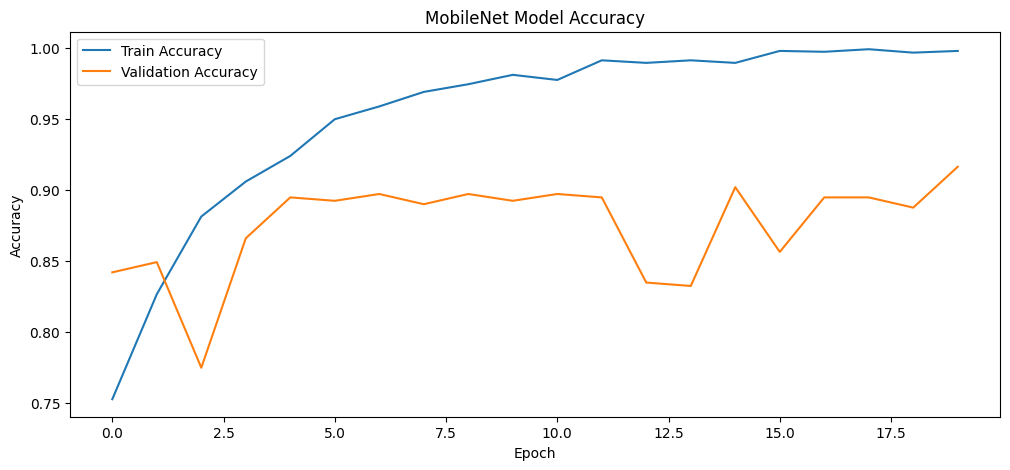

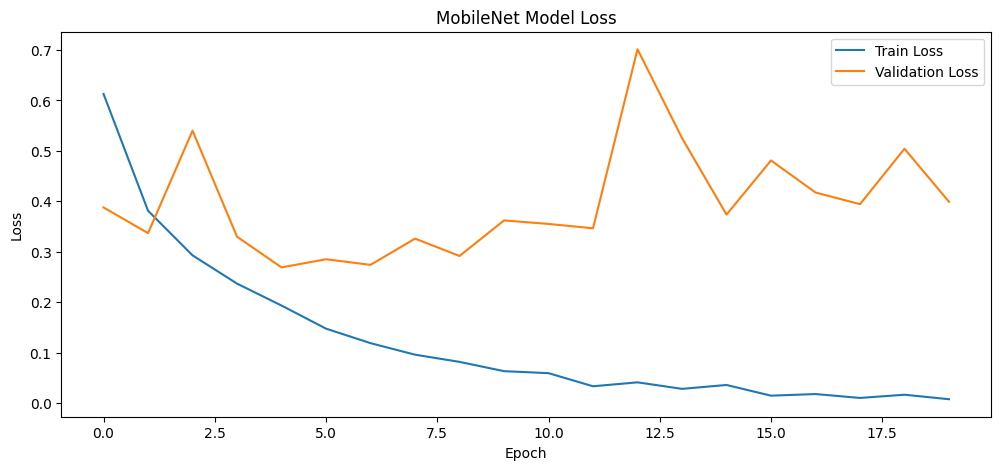

In [56]:
plot_metrics(history_mobilenet, "MobileNet")


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step

<Functional name=functional_9, built=True> Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       135
           1       0.92      0.96      0.94       282

    accuracy                           0.92       417
   macro avg       0.91      0.89      0.90       417
weighted avg       0.92      0.92      0.92       417



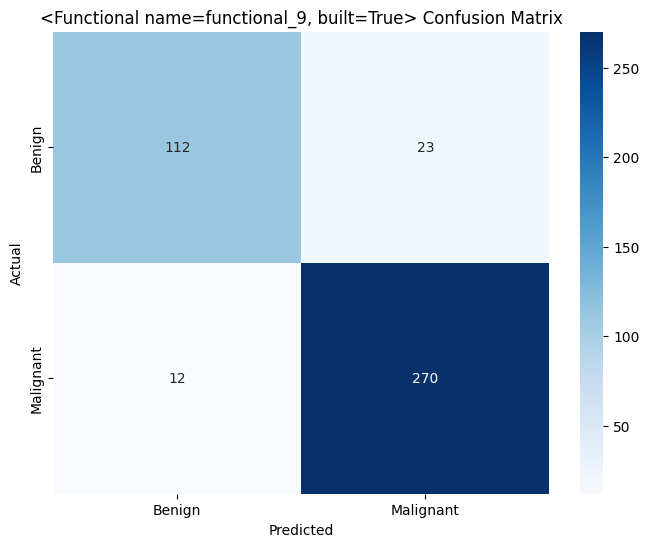

In [57]:
# Confusion matrix and classification report
y_pred = (model_mobilenet.predict(X_test) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)
print(f"\n{model_mobilenet} Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'{model_mobilenet} Confusion Matrix')
plt.show()